In [2]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 

In [3]:
employee = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Advanced ML\Boosting\employee.csv")
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print ("Rows     : " ,employee.shape[0])
print ("Columns  : " ,employee.shape[1])


Rows     :  1470
Columns  :  35


In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Missing Value

In [5]:
employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Removing Irrelavent Variable 

In [6]:
print(employee.EmployeeCount.unique())
print(employee.EmployeeNumber.unique())
print(employee.Over18.unique())
print(employee.StandardHours.unique())

[1]
[   1    2    4 ... 2064 2065 2068]
['Y']
[80]


In [7]:
employee = employee.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
# #Employee Numeric columns
employee_num = employee.select_dtypes(include=[np.number])
employee_num.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0


In [14]:
employee_dummies = employee.select_dtypes(include=['object'])
employee_dummies.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [15]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1


In [16]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)
employee_combined.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,...,3,0,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,...,2,2,0,2,1,3,1,2,1,0


# Data Partition-1

In [18]:
from sklearn.model_selection import train_test_split

X = employee_combined.drop('Attrition',axis=1)
y = employee_combined[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [19]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 1176.
The number of samples into the Test data is 294.


# Ada Boosting

### Manual 

#### Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=3,  #how many tree ( Stump ) we want to make 
                         learning_rate=0.5) # its tunning Parameter & range = 0-1
# Train Adaboost Classifer
Adamodel = abc.fit(x_train, y_train)

### Grid Search Method

In [20]:
model_parameters = {'n_estimators': [30, 50, 100, 150],  # number of Tree (Weak Model)
                    'learning_rate': [0.1, 0.5, 0.4, 1]}

In [22]:
abc = AdaBoostClassifier() 
gscv_ADA = GridSearchCV(estimator=abc, 
                    param_grid=model_parameters, 
                    cv=10, 
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_ADA.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.4, 1],
                         'n_estimators': [30, 50, 100, 150]},
             scoring='accuracy')

In [23]:
print('The best parameter are -', gscv_ADA.best_params_)

The best parameter are - {'learning_rate': 0.5, 'n_estimators': 150}


In [24]:
# Re-fit the model with the best parameters
final_mod_ADA = AdaBoostClassifier(**gscv_ADA.best_params_)
final_mod_ADA.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=150)

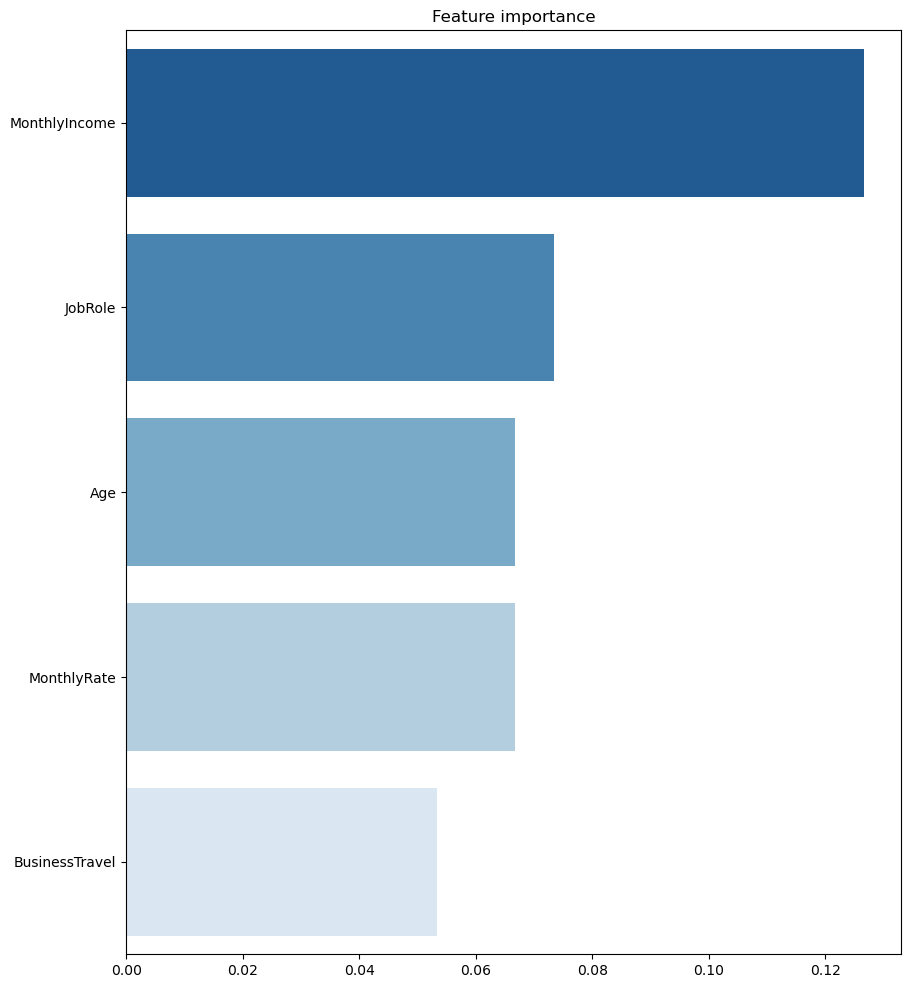

In [25]:
# Plot features importances
imp = pd.Series(data=final_mod_ADA.feature_importances_, index=final_mod_ADA.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

# Prediction

In [26]:
train_pred = final_mod_ADA.predict(x_train)

# Confusion Matrix Train Data 

In [27]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       997
           1       0.90      0.51      0.65       179

    accuracy                           0.92      1176
   macro avg       0.91      0.75      0.80      1176
weighted avg       0.92      0.92      0.91      1176



# Confusion Matrix Test Data 

In [28]:
test_pred = final_mod_ADA.predict(x_test)

In [29]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       236
           1       0.79      0.45      0.57        58

    accuracy                           0.87       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.86      0.87      0.85       294



# Finished